# **Modeling randomness**

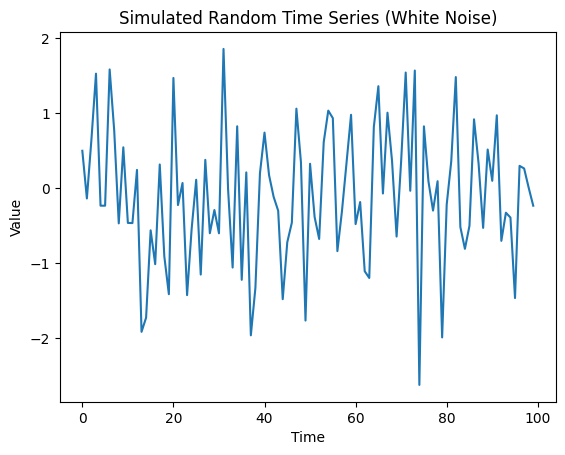

In [12]:
#  simulate a random time series using white noise.
import numpy as np
import matplotlib.pyplot as plt

# Generate white noise
np.random.seed(42)
random_series = np.random.normal(0, 1, 100)

# Plot the series
plt.plot(random_series)
plt.title("Simulated Random Time Series (White Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


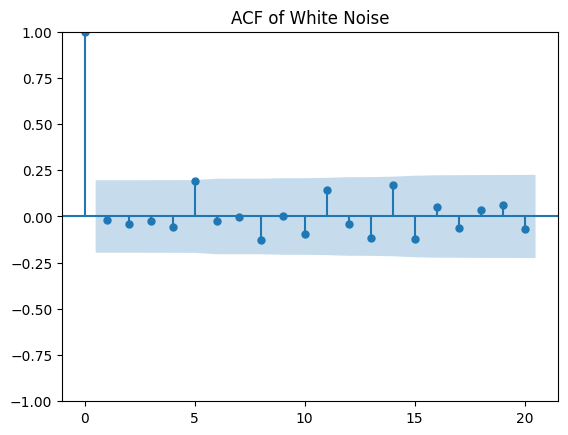

In [13]:
# Autocorrelation Function (ACF)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_series)
plt.title("ACF of White Noise")
plt.show()


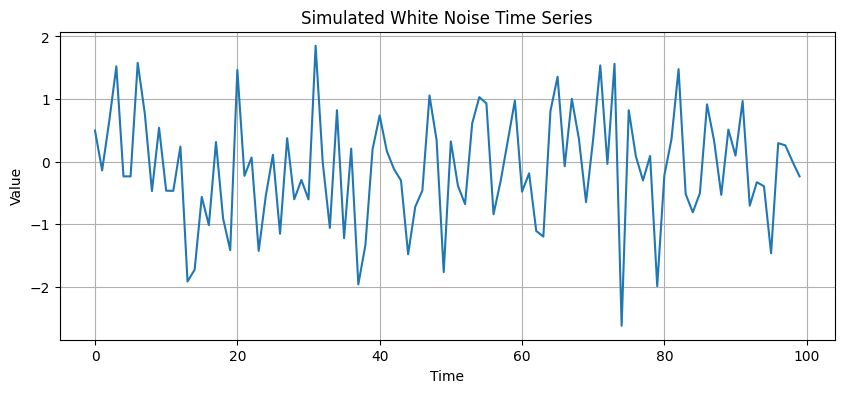

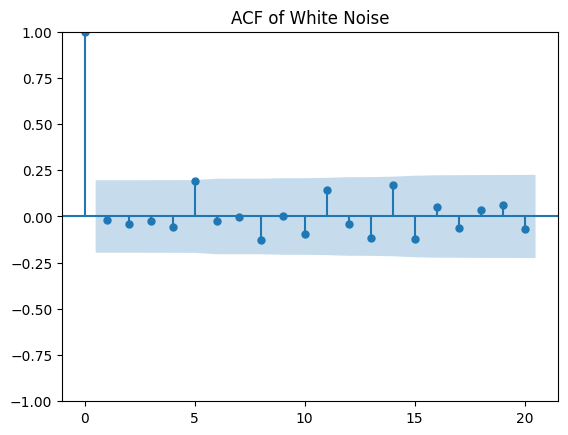

,lb_stat,lb_pvalue
10,7.468256,0.680622


In [14]:
# code implimentation
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Simulate white noise time series
np.random.seed(42)
white_noise = np.random.normal(0, 1, 100)

# Plot the white noise time series
plt.figure(figsize=(10, 4))
plt.plot(white_noise)
plt.title('Simulated White Noise Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot the Autocorrelation Function (ACF)
plot_acf(white_noise, lags=20, title='ACF of White Noise')
plt.show()

# Perform the Ljung-Box Test
ljung_box_results = acorr_ljungbox(white_noise, lags=[10], return_df=True)
ljung_box_results


In [15]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox

result = acorr_ljungbox(random_series, lags=[10])
print(f"P-value of Ljung-Box Test: {result['lb_pvalue'].values[0]}")


P-value of Ljung-Box Test: 0.6806216971337476


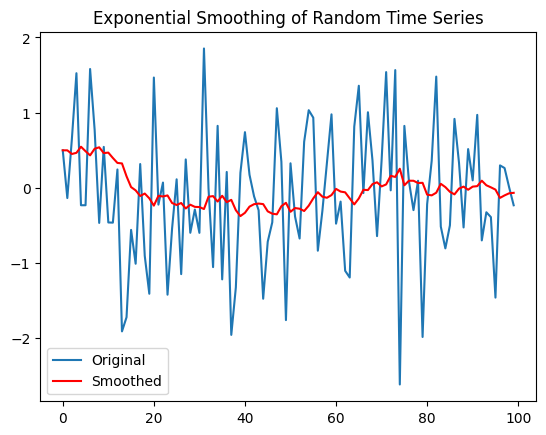

In [16]:
# Smoothing Techniques
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(random_series).fit()
smoothed_series = model.fittedvalues

plt.plot(random_series, label='Original')
plt.plot(smoothed_series, label='Smoothed', color='red')
plt.legend()
plt.title("Exponential Smoothing of Random Time Series")
plt.show()


# **Finding memory**

In [23]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.regressionplots import abline_plot
import yfinance as yfin
import datetime
!pip install pmdarima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.9 MB/s eta 0:00:00


In [24]:
!pip install pmdarima

In [25]:
# Helper MA(q) function
def MA(q, theta=0.6, nsample=300):
    np.random.seed(12345)
    arparams = np.array([0 for i in range(q)])
    maparams = np.array([theta for i in range (q)])
    ar = np.r_[1, -arparams] # add zero-lag and negate
    ma = np.r_[1, maparams] # add zero-lag
    y = arma_generate_sample(ar, ma, nsample=nsample)
    return y

In [26]:
plt.rcParams["figure.figsize"] = (8, 4)  # Figure size and width

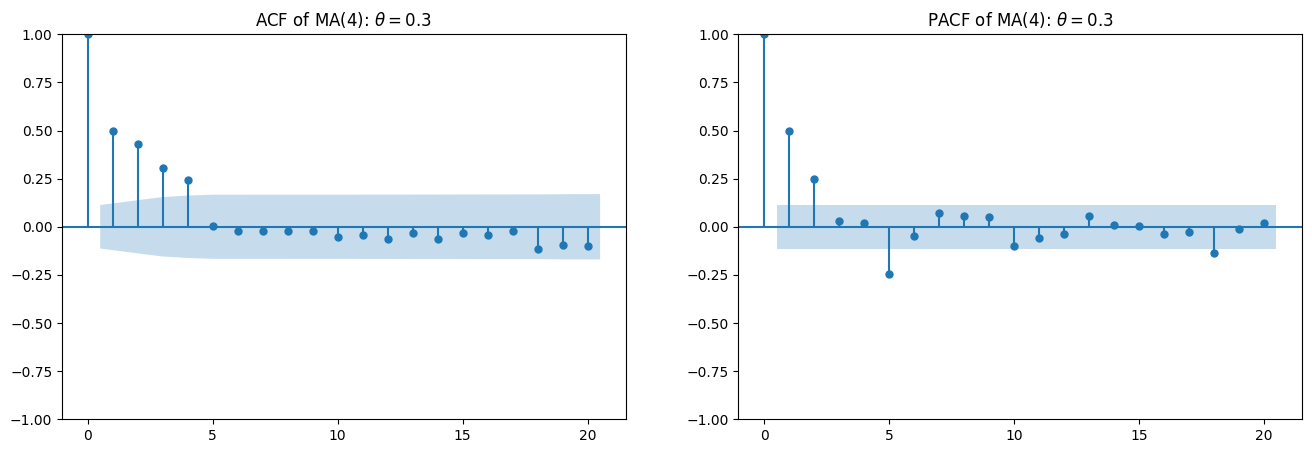

In [27]:
# ACF and PACF of MA(4)
q = 4
theta = 0.3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    MA(q, theta=theta),
    title=f"ACF of MA({q}): $\\theta={theta}$",
    lags=20,
    ax=ax1,
)
sm.graphics.tsa.plot_pacf(
    MA(q, theta=theta),
    title=f"PACF of MA({q}): $\\theta={theta}$",
    lags=20,
    ax=ax2,
)
plt.show()

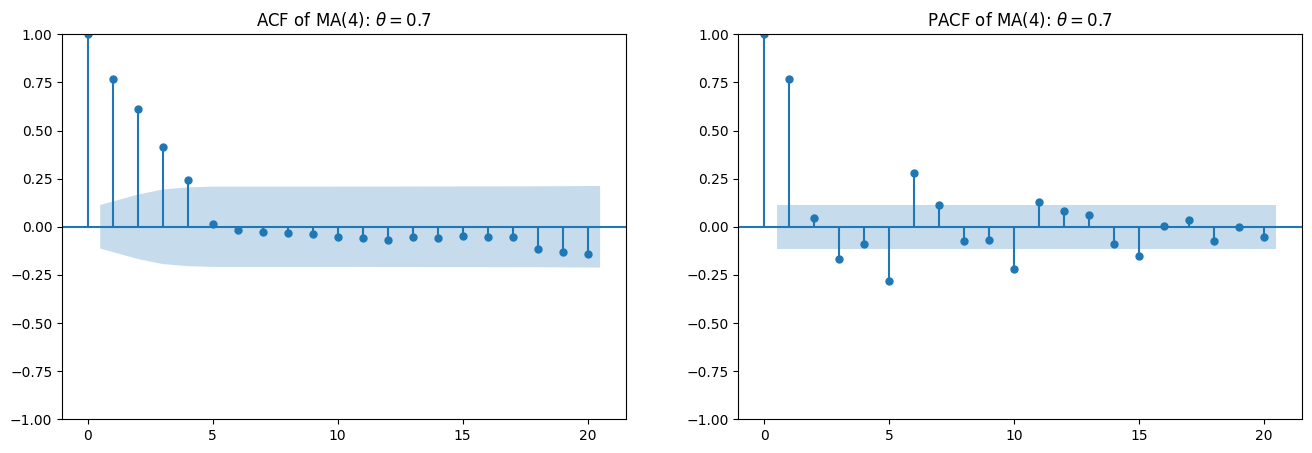

In [28]:
# ACF and PACF of MA(4)
q = 4
theta = 0.7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    MA(q, theta=theta),
    title=f"ACF of MA({q}): $\\theta={theta}$",
    lags=20,
    ax=ax1,
)
sm.graphics.tsa.plot_pacf(
    MA(q, theta=theta),
    title=f"PACF of MA({q}): $\\theta={theta}$",
    lags=20,
    ax=ax2,
)
plt.show()

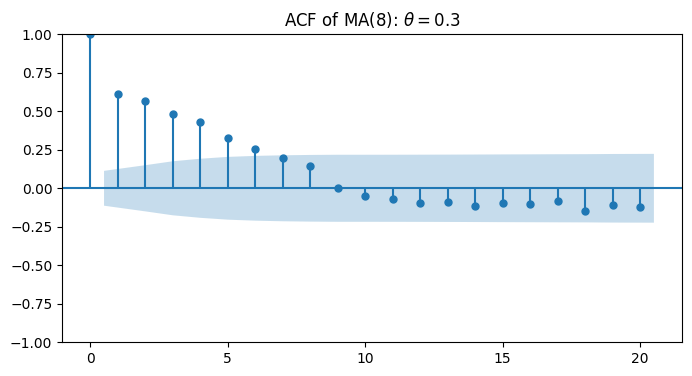

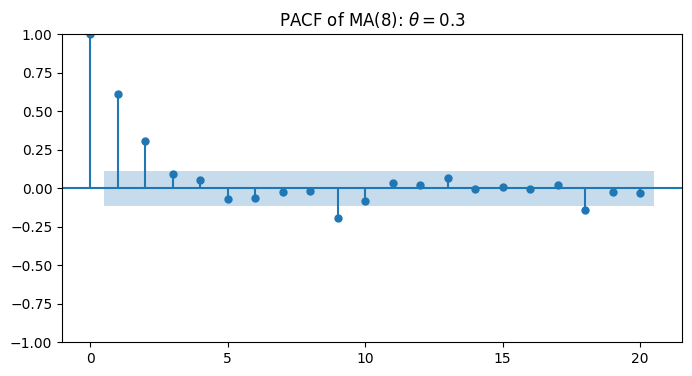

In [29]:
# ACF and PACF of MA(8)
q = 8
theta = 0.3
sm.graphics.tsa.plot_acf(MA(q, theta=theta), title=f"ACF of MA({q}): $\\theta={theta}$", lags=20)
sm.graphics.tsa.plot_pacf(MA(q, theta=theta), title=f"PACF of MA({q}): $\\theta={theta}$", lags=20)
plt.show()

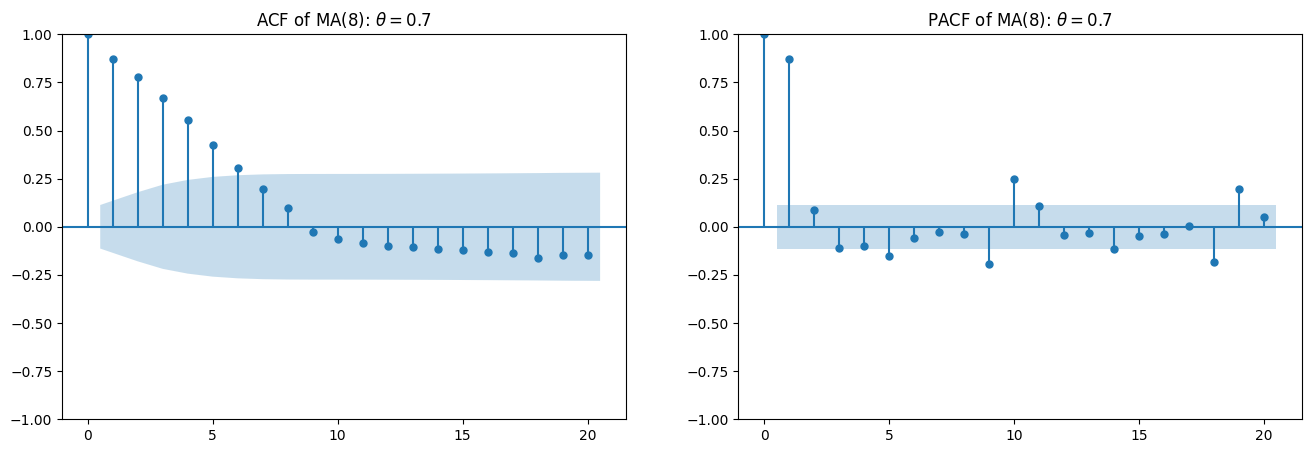

In [30]:
# ACF and PACF of MA(8)
q = 8
theta = 0.7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    MA(q, theta=theta),
    title=f"ACF of MA({q}): $\\theta={theta}$",
    lags=20,
    ax=ax1,
)
sm.graphics.tsa.plot_pacf(
    MA(q, theta=theta),
    title=f"PACF of MA({q}): $\\theta={theta}$",
    lags=20,
    ax=ax2,
)
plt.show()

In [31]:
# Efficient ARIMA model Selection
# with modified setting
y = MA(3, theta=0.3, nsample=1000)
mod_can_auto = auto_arima(
    y,  # stepwise=False,
    start_p=0,
    start_q=0,
    max_p=5,
    max_d=5,
    max_q=5,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3017.020, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2872.316, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2913.186, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2842.564, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2839.165, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2814.792, Time=0.17 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2816.061, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2816.264, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2828.410, Time=0.32 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2817.970, Time=0.49 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2816.785, Time=0.34 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 2.284 seconds


In [32]:
# Efficient ARIMA model Selection
# with default setting
y = MA(3, theta=0.3, nsample=1000)
mod_can_auto = auto_arima(
    y,  # stepwise=False,
    start_p=2,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2826.406, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3017.020, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2872.316, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2913.186, Time=0.82 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2835.653, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2842.681, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2811.811, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2828.410, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2812.098, Time=0.75 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2809.727, Time=0.40 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2807.848, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2806.399, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2804.464, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2876.429, Time=0.12 sec
 ARIMA(0,0,4)(0,0,0)[0]          

# **Autocorellation**

In [33]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Simulate data
np.random.seed(42)
time = np.arange(500)
data = 0.5 * time + np.random.normal(size=500)

# Fit OLS model
model = sm.OLS(data, sm.add_constant(time)).fit()
residuals = model.resid

# Definition: Technical definition using formulas or equations
def autocorrelation_coefficient(series, lag=1):
    return np.corrcoef(series[:-lag], series[lag:])[0, 1]


# Demonstration: Numerical example
print(f"Autocorrelation coefficient at lag 1: {autocorrelation_coefficient(residuals, lag=1)}")



Autocorrelation coefficient at lag 1: -0.0046422747330447075


Diagram and demonstration

Text(0, 0.5, 'Residuals')

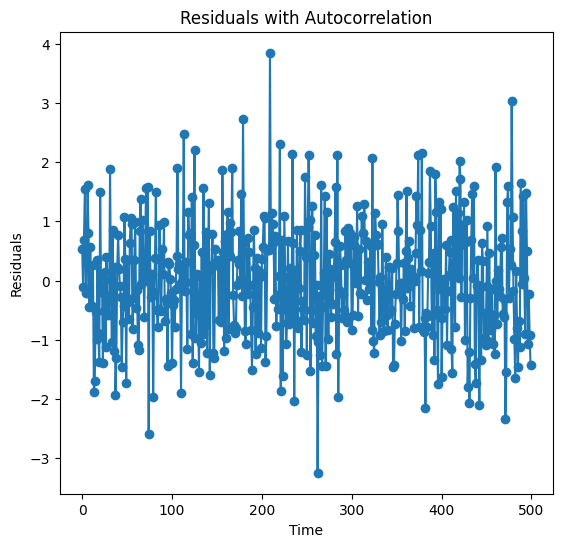

In [34]:


# Diagram: Visual example
plt.figure(figsize=(14, 6))

# Time series plot of residuals
plt.subplot(1, 2, 1)
plt.plot(time, residuals, marker='o', linestyle='-')
plt.title('Residuals with Autocorrelation')
plt.xlabel('Time')
plt.ylabel('Residuals')




Autocorretion demostration

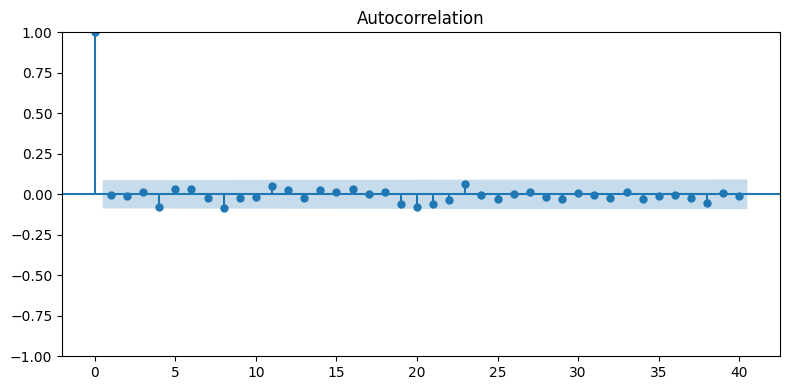

In [35]:

# Autocorrelation plot
plt.subplot(1, 1, 1)
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=plt.gca())

plt.tight_layout()
plt.show()



Diadnosis

In [36]:

# Diagnosis: Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")



Durbin-Watson statistic: 2.004452679121468


# **Heteroskedasticity**

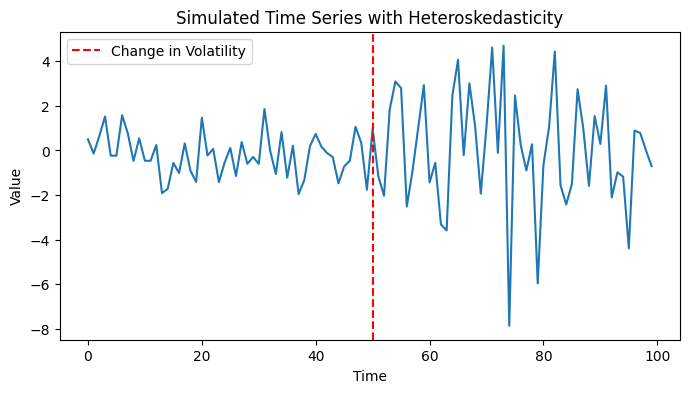

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate heteroskedastic time series
np.random.seed(42)
low_volatility = np.random.normal(0, 1, 50)
high_volatility = np.random.normal(0, 3, 50)
heteroskedastic_series = np.concatenate([low_volatility, high_volatility])

# Plot the series
plt.plot(heteroskedastic_series)
plt.title("Simulated Time Series with Heteroskedasticity")
plt.xlabel("Time")
plt.ylabel("Value")
plt.axvline(x=50, color='r', linestyle='--', label='Change in Volatility')
plt.legend()
plt.show()


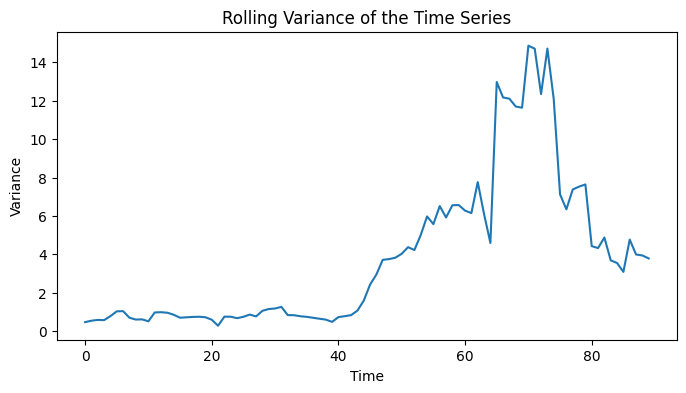

In [38]:
# Rolling Variance Plot
rolling_variance = [np.var(heteroskedastic_series[i:i+10]) for i in range(len(heteroskedastic_series)-10)]
plt.plot(rolling_variance)
plt.title("Rolling Variance of the Time Series")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.show()


In [39]:
#    Engle's ARCH Test:
from statsmodels.stats.diagnostic import het_arch

p_value = het_arch(heteroskedastic_series)[1]
print(f"P-value of Engle's ARCH Test: {p_value}")


P-value of Engle's ARCH Test: 0.03118629626074742


In [40]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 10.3 MB/s eta 0:00:00


In [41]:
# GARCH(1,1) model:
from arch import arch_model

model = arch_model(heteroskedastic_series, vol='Garch', p=1, q=1)
result = model.fit()
print(result.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 419.9115332766931
Iteration:      2,   Func. Count:     16,   Neg. LLF: 155299394.29784572
Iteration:      3,   Func. Count:     23,   Neg. LLF: 278.70421060177597
Iteration:      4,   Func. Count:     29,   Neg. LLF: 190.21543944804736
Iteration:      5,   Func. Count:     34,   Neg. LLF: 190.21649887069677
Iteration:      6,   Func. Count:     40,   Neg. LLF: 190.1767366194237
Iteration:      7,   Func. Count:     45,   Neg. LLF: 190.17669184301542
Iteration:      8,   Func. Count:     50,   Neg. LLF: 190.17668607912643
Iteration:      9,   Func. Count:     54,   Neg. LLF: 190.17668606780094
Optimization terminated successfully    (Exit mode 0)
            Current function value: 190.17668607912643
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:        

In [44]:
# Log Transformation
log_series = np.log(np.abs(heteroskedastic_series) + 1)
log_series

array([0.40327214, 0.12950456, 0.49937342, 0.9254605 , 0.21038521,
       0.21037191, 0.94748424, 0.56952919, 0.38490478, 0.4334434 ,
       0.38077459, 0.38235324, 0.21669261, 1.06927968, 1.00243827,
       0.44615111, 0.69954225, 0.27326413, 0.64606819, 0.88058218,
       0.90245497, 0.20357436, 0.06534589, 0.88572768, 0.4346243 ,
       0.10519083, 0.76592986, 0.31896125, 0.47040273, 0.25595434,
       0.47106969, 1.04811804, 0.01340695, 0.72159417, 0.60023383,
       0.79788715, 0.18968074, 1.08507782, 0.84508944, 0.17970249,
       0.55300345, 0.15817254, 0.10943566, 0.2632129 , 0.90766241,
       0.54223371, 0.37887385, 0.72130803, 0.29536619, 1.01633158,
       0.67917599, 0.76790526, 1.10881539, 1.04205212, 1.40927785,
       1.33337879, 1.25779388, 0.65629497, 0.6900375 , 1.36778292,
       0.89098224, 0.44274608, 1.46302503, 1.5235793 , 1.234767  ,
       1.62308834, 0.19559175, 1.38894053, 0.73472477, 1.07682985,
       0.73437876, 1.72528302, 0.10208546, 1.73940087, 2.18146